# Machine Learning MT2

[Follow This Example](https://towardsdatascience.com/building-your-first-neural-network-in-tensorflow-2-tensorflow-for-hackers-part-i-e1e2f1dfe7a0)

[Digits example I did in undergrad](http://neuralnetworksanddeeplearning.com/chap1.html)

[Numerical Example](https://www.machinecurve.com/index.php/2019/07/18/can-neural-networks-approximate-mathematical-functions/)

## Following a specific example

[Follow This Example](https://towardsdatascience.com/building-your-first-neural-network-in-tensorflow-2-tensorflow-for-hackers-part-i-e1e2f1dfe7a0)

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print ('Complete')

Complete


Classifying images of clothes based on type (t-shirt,trousers,pullovers,dress,coat...)

### Generate Training and Validation Data

This methodology assumes a pipeline of $x\rightarrow y$, with one big batch of data being split into training and validation data. 

1. Training Data: Contains the input data AND the correct output. We will use this to train our NN by feeding it the input, and asking it to learn the output iteratively by changing weights and such.

1. Validation data: Contains a different set of input data and output data. In this case though, we input and the NN makes a prediction based on its prior training. We then compare the NN predicted output to the actual truth output.


In [3]:
(x_train,y_train),(x_val,y_val) = keras.datasets.fashion_mnist.load_data()

### Preprocess the data

It is helpful to normalize the data to take values between $[0,1]$

In [4]:
def preprocess(x, y):
    x = tf.cast(x, tf.float32) / 255.0 # This normalizes our input data
    y = tf.cast(y, tf.int64) # We are choosing 10 classifications of clothing
    return (x,y)


def create_dataset(xs, ys, n_classes=10):
    ys = tf.one_hot(ys, depth=n_classes)
    return tf.data.Dataset.from_tensor_slices((xs, ys)) \
    .map(preprocess) \
    .shuffle(len(ys)) \
    .batch(128)

### Create Training and validation datasets

In [5]:
train_dataset = create_dataset(x_train, y_train)
val_dataset = create_dataset(x_val, y_val)

print ((train_dataset))

print ('Complete')

<BatchDataset shapes: ((None, 28, 28), (None, 10)), types: (tf.float32, tf.int64)>
Complete


### Construct the Model

In [6]:
model = keras.Sequential([
    keras.layers.Reshape(target_shape=(28 * 28,), input_shape=(28, 28)),
    keras.layers.Dense(units=256, activation='relu'),
    keras.layers.Dense(units=192, activation='relu'),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')
])

print ('Complete')

Complete


### Train

In [7]:
model.compile(optimizer='adam', 
              loss=tf.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(
    train_dataset.repeat(), 
    epochs=10, 
    steps_per_epoch=500,
    validation_data=val_dataset.repeat(), 
    validation_steps=2
)

print ('Complete')

Epoch 1/10


C:\Users\asg00\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1096: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


500/500 [==============================] - 46s 64ms/step - loss: 0.4873 - accuracy: 0.8271 - val_loss: 0.3802 - val_accuracy: 0.8633
Epoch 2/10
500/500 [==============================] - 27s 54ms/step - loss: 0.3580 - accuracy: 0.8692 - val_loss: 0.3941 - val_accuracy: 0.8516
Epoch 3/10
500/500 [==============================] - 25s 51ms/step - loss: 0.3167 - accuracy: 0.8832 - val_loss: 0.3687 - val_accuracy: 0.8867
Epoch 4/10
500/500 [==============================] - 24s 48ms/step - loss: 0.2934 - accuracy: 0.8918 - val_loss: 0.3715 - val_accuracy: 0.8711
Epoch 5/10
500/500 [==============================] - 25s 50ms/step - loss: 0.2790 - accuracy: 0.8966 - val_loss: 0.4359 - val_accuracy: 0.8320
Epoch 6/10
500/500 [==============================] - 24s 48ms/step - loss: 0.2615 - accuracy: 0.9021 - val_loss: 0.3109 - val_accuracy: 0.8789
Epoch 7/10
500/500 [==============================] - 26s 52ms/step - loss: 0.2489 - accuracy: 0.9076 - val_loss: 0.3695 - val_accuracy: 0.8789
Epo

### Validate Model

In [8]:
predictions = model.predict(val_dataset)

print((predictions))

[[2.91233533e-04 1.32338473e-05 5.13189882e-02 ... 3.58947636e-06
  1.79020237e-04 2.17634692e-06]
 [4.36535714e-07 1.31589638e-06 3.67322770e-07 ... 9.98247027e-01
  4.28079766e-05 1.59431808e-03]
 [1.21952504e-10 5.50508424e-12 1.33319709e-11 ... 9.99984026e-01
  7.65699948e-09 1.27271426e-06]
 ...
 [1.06507119e-15 1.55295147e-18 8.42829546e-17 ... 1.53638370e-16
  1.18097258e-18 6.58363007e-15]
 [4.94367614e-09 9.99999762e-01 2.26085173e-09 ... 5.47687438e-15
  4.52893190e-08 9.50154799e-12]
 [1.63923902e-03 1.02838225e-04 3.89882662e-05 ... 1.01078634e-09
  3.60372468e-07 9.58308899e-09]]


# W Mass Project

## General Setup

W boson produced at rest and decays into a lepton and neutrino.
We want to use the lepton 4-vector as input, and output the w_mass using something related to mT.

More precisely, we have a distribution of lepton 4-vectors $\{ (p^\mu)_\ell \}$, one for each event. From this, we construct $m_T$, and can use the resulting distribution of $m_T$ to determine the W mass.

### Background

Lets consider a W decaying into an electron and neutrino. Represent this process schematically with $W\rightarrow A\bar{B}$ with the bar being hidden.

In general, each of these has an associated 4-momentum:
* $W^\mu = (E_W, \vec{p_W})$
* $A^\mu = (E_A, \vec{p_A})$
* $\bar{B}^\mu = (E_\bar{B}, \vec{p_\bar{B}})$

Without any constraints, this represents 12 free parameters.

We can constrain some of them using energy-momentum conservation (4) and on-shell (3), yielding 5 remaining unconstrained parameters.

If we impose that everything except the W is massless, our intitlal conditions become (using the on-shell condition):
* $W^\mu = (m_W, \vec{0})$
* $A^\mu = (|\vec{p_A}|, \vec{p_A})$
* $\bar{B}^\mu = (|\vec{p_\bar{B}}|, \vec{p_\bar{B}})$

If we further impose energy-momentum conservation, we have:
* $W^\mu = (m_W, \vec{0})$
* $A^\mu = (\frac{1}{2}m_W, \vec{p_A})$
* $\bar{B}^\mu = (\frac{1}{2}m_W, -\vec{p_A})$

and we see that the maximum energy of the lepton A can be $E_A = |\vec{p_A}| = \frac{1}{2}m_W$.

In terms of the computation, this relation defines how we generate the training data.
$$ \sqrt{p_x^2 + p_y^2 + p_z^2} = \frac{1}{2}m_W $$

Once we choose two components, the third is fixed by this condition.

$$ p_z = \left[ \frac{1}{4}m_W^2 - p_x^2 - p_y^2 \right]^{\frac{1}{2}} $$

__________________________

After talking with Flip, another formulation to do this is the following:
In the rest frame of the W, assume isotropic decay

1. Choose a random number between in $[-1,1]$ for $\cos\theta$ and another random number in $[0,2\pi]$ for $\phi$.
2. Give it a maginitude of $\frac{1}{2}m_W$
3. Promote this to a unit vector using on-shell



### Computing M_T

From wiki:
$$M_T^2 = m^2 + p_x^2 + p_y^2$$

### Computing the Lorentz Boost

From the second paragraph, last sentence of [this paper](https://arxiv.org/abs/2112.11266), the parton energy fractions (parton z momentum / proton z momentum) range from $10^{-5} - 10^0$. All in one statement, $$10^{-5} < \frac{p_z}{p} \sim \frac{T}{E} < 10^0$$

The kinetic energy $T$ is related to the beam energy $E$ by:
$$\gamma = 1+\frac{T}{E}$$, where we are obtain the  ratio $\frac{T}{E}$ from a Gaussian distribution centered at the midpoint $10^{-2.5}$ with variance (arbitrarily chosen by me) of $10^{-1}$.

Given gamma, beta is found by inverting the equation for gamma, yielding:
$$ \beta = \sqrt{ 1-\frac{1}{\gamma^2} }$$

The Lorentz boost is then computed as:
\begin{matrix} 
E' = \gamma(E-\beta p_z) \\
p_z' = \gamma(p_z - \beta E)
\end{matrix}

### The Algorithm

We want to construct data for the visible decay product labeled "A" above

1. Determine a random-direction 3-momentum vector. Pick a random direction in $(\theta,\phi)$, set $r = \frac{1}{2}m_W$
2. Compute the cartesian momentum. (Convert spherical to cartesian coordinates)
3. Promote the 3-momentum to a 4-momentum using the on-shell relation
3. Obtain the lorentz boost along the z-direction from the Gaussian distribution detailed above.
4. Do the boost
5. Compute $m_T^2$ as detailed above
6. Record all values in dataframe


## Generate The Data

In [9]:
import numpy as np
import pandas as pd
from tensorflow import keras


import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [11]:
def makeData(numData,mW = 80,zBoost = False):
    columns = ['E','Px','Py','Pz','zBoost','E2','Px2','Py2','Pz2','mW','mTSquared']
    dataVect = []
    for i in range(0,numData):
        theta = np.random.uniform(0,np.pi)
        phi   = np.random.uniform(0,2*np.pi)
        r     = 1/2*mW
        
        
        px0 = r*np.sin(theta)*np.cos(phi)
        py0 = r*np.sin(theta)*np.sin(phi)
        pz0 = r*np.cos(theta)
        E0  = 1/2*mW

        
        if zBoost:
            gammaMin = 1+1e-5
            gammaMax = 2
            gamma = np.random.normal((gammaMin+gammaMax)/2,0.1)
            beta = np.sqrt(1-(1/gamma**2))
        
        else:
            gamma = 1
            beta = 0
        
        E  = gamma*(E0 - beta*pz0)       
        px = px0
        py = py0
        pz = gamma*(pz0 - beta*E0)
        
        E2 = E**2
        px2,py2,pz2 = px**2,py**2,pz**2
#         mTSquared = (mW)**2
#         mTSquared = 2*(1/2*mW)**2 + 2*(px**2 + py**2)
        mTSquared = mW**2 + px**2 + py**2
#         mTSquared = E**2 - pz**2
#         print (mTSquared1,mTSquared2,mTSquared3)
        dataEntry = np.asarray([E,px,py,pz,gamma,E2,px2,py2,pz2,mW,mTSquared])
        dataVect.append(dataEntry)
        dataSet = pd.DataFrame(dataVect,columns = columns)
    return dataSet

rawData = (makeData(1000, zBoost = True))

print (rawData.head(5))

           E         Px         Py         Pz    zBoost           E2  \
0  27.094835  -4.835308  26.646214   0.853909  1.443489   734.130083   
1  93.056019 -13.599311  22.332121 -89.307098  1.490238  8659.422664   
2  20.031061  15.126378  -8.875120   9.678240  1.473808   401.243400   
3  99.388874  -6.194282   9.333720 -98.755561  1.461520  9878.148311   
4  55.645058   0.419815 -39.944690 -38.737810  1.444846  3096.372456   

          Px2          Py2          Pz2    mW    mTSquared  
0   23.380202   710.020720     0.729161  80.0  7133.400922  
1  184.941265   498.723635  7975.757764  80.0  7083.664900  
2  228.807313    78.767749    93.668339  80.0  6707.575061  
3   38.369129    87.118320  9752.660861  80.0  6525.487449  
4    0.176245  1595.578261  1500.617950  80.0  7995.754506  


### Boost Histogram

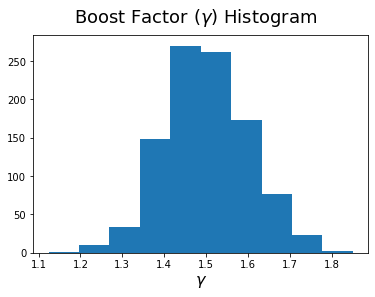

In [12]:
plt.hist(rawData.zBoost)
plt.suptitle(r'Boost Factor $(\gamma)$ Histogram', size = 18)
plt.xlabel(r'$\gamma$',size = 16)
plt.show()

## Split it into testing and training

In [13]:
dataInput1 = rawData[['E','Px','Py','Pz']]
dataInput2 = rawData[['E2','Px2','Py2','Pz2']]
features1  = rawData[['mW']]
features2  = rawData[['mTSquared']]

X1 = dataInput1
X2 = dataInput2
y1 = features1
y2 = features2

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.1)
X_train2, X_test2, y_train1, y_test1 = train_test_split(X2, y1, test_size=0.1)
X_train1, X_test1, y_train2, y_test2 = train_test_split(X1, y2, test_size=0.1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.1)


print ('Complete')

Complete


## Train The Neural Net

In [14]:
model1 = keras.Sequential()
model1.add(keras.layers.Dense(4,input_dim = 4,activation = 'relu'))
model1.add(keras.layers.Dense(4))
model1.add(keras.layers.Dense(1))
model1.compile(loss='mean_squared_error', optimizer='adam', metrics = ['accuracy'])
history1 = model1.fit(X_train1, y_train1,verbose = 2, epochs=15, batch_size=32, shuffle = True)
print ('--------------')

model2 = keras.Sequential()
model2.add(keras.layers.Dense(4,input_dim = 4,activation = 'relu'))
model2.add(keras.layers.Dense(4))
model2.add(keras.layers.Dense(1))
model2.compile(loss='mean_squared_error', optimizer='adam', metrics = ['accuracy'])
history2 = model2.fit(X_train2, y_train1,verbose = 2, epochs=15, batch_size=32, shuffle = True)
print ('--------------')

model3 = keras.Sequential()
model3.add(keras.layers.Dense(4,input_dim = 4,activation = 'relu'))
model3.add(keras.layers.Dense(4))
model3.add(keras.layers.Dense(1))
model3.compile(loss='mean_squared_error', optimizer='adam', metrics = ['accuracy'])
history3 = model3.fit(X_train1, y_train2,verbose = 2, epochs=15, batch_size=32, shuffle = True)
print ('--------------')

model4 = keras.Sequential()
model4.add(keras.layers.Dense(4,input_dim = 4,activation = 'relu'))
model4.add(keras.layers.Dense(4))
model4.add(keras.layers.Dense(1))
model4.compile(loss='mean_squared_error', optimizer='adam', metrics = ['accuracy'])
history4 = model4.fit(X_train2, y_train2,verbose = 2, epochs=15, batch_size=32, shuffle = True)


print ('Complete')

Epoch 1/15
29/29 - 6s - loss: 7303.7432 - accuracy: 0.0000e+00 - 6s/epoch - 206ms/step
Epoch 2/15
29/29 - 0s - loss: 6583.3203 - accuracy: 0.0000e+00 - 236ms/epoch - 8ms/step
Epoch 3/15
29/29 - 0s - loss: 5901.2656 - accuracy: 0.0000e+00 - 233ms/epoch - 8ms/step
Epoch 4/15
29/29 - 0s - loss: 5067.2144 - accuracy: 0.0000e+00 - 258ms/epoch - 9ms/step
Epoch 5/15
29/29 - 0s - loss: 4155.1909 - accuracy: 0.0000e+00 - 267ms/epoch - 9ms/step
Epoch 6/15
29/29 - 0s - loss: 3393.7798 - accuracy: 0.0000e+00 - 328ms/epoch - 11ms/step
Epoch 7/15
29/29 - 0s - loss: 2981.0994 - accuracy: 0.0000e+00 - 149ms/epoch - 5ms/step
Epoch 8/15
29/29 - 0s - loss: 2819.5068 - accuracy: 0.0000e+00 - 216ms/epoch - 7ms/step
Epoch 9/15
29/29 - 0s - loss: 2729.9941 - accuracy: 0.0000e+00 - 277ms/epoch - 10ms/step
Epoch 10/15
29/29 - 0s - loss: 2650.4028 - accuracy: 0.0000e+00 - 281ms/epoch - 10ms/step
Epoch 11/15
29/29 - 0s - loss: 2576.0059 - accuracy: 0.0000e+00 - 355ms/epoch - 12ms/step
Epoch 12/15
29/29 - 0s - lo

### Plot Training History

dict_keys(['loss', 'accuracy'])


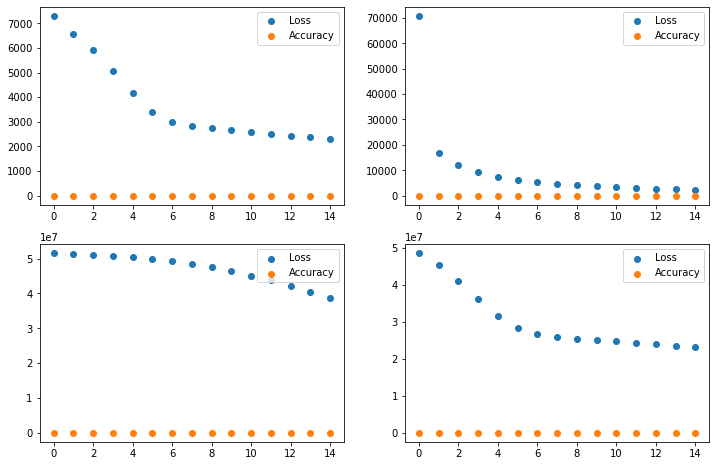

In [15]:
print (history1.history.keys())
epochRange = range(0,len(history1.history['loss']))

fig1, axs1 = plt.subplots(2, 2, figsize = (12,8))

axs1[0,0].scatter(epochRange,(history1.history['loss']),label = 'Loss')
axs1[0,0].scatter(epochRange,(history1.history['accuracy']),label = 'Accuracy')
axs1[0,0].legend(loc = 'upper right')

axs1[0,1].scatter(epochRange,(history2.history['loss']),label = 'Loss')
axs1[0,1].scatter(epochRange,(history2.history['accuracy']),label = 'Accuracy')
axs1[0,1].legend(loc = 'upper right')

axs1[1,0].scatter(epochRange,(history3.history['loss']),label = 'Loss')
axs1[1,0].scatter(epochRange,(history3.history['accuracy']),label = 'Accuracy')
axs1[1,0].legend(loc = 'upper right')

axs1[1,1].scatter(epochRange,(history4.history['loss']),label = 'Loss')
axs1[1,1].scatter(epochRange,(history4.history['accuracy']),label = 'Accuracy')
axs1[1,1].legend(loc = 'upper right')


I think there is something about plotting these with the same bin sizes or something. We want 10 bins for each, but they are currently being plotted with the same absolute bin size, so one graph looks normal and the other has an effective bin size that is way too small.

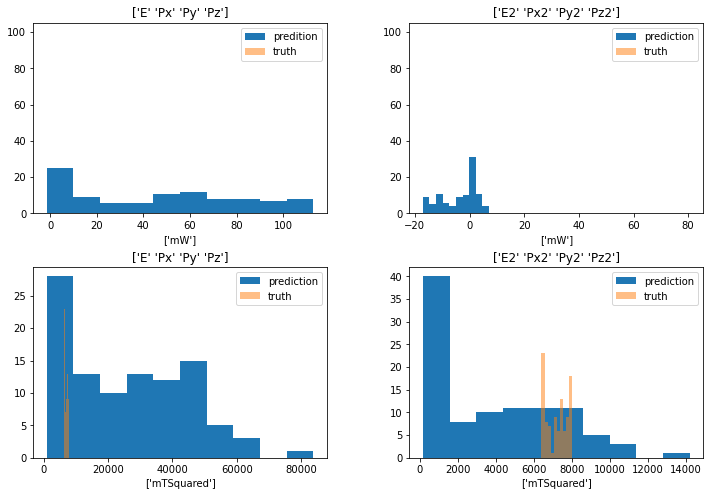

In [16]:
pre1 = model1.predict(X_test1)
pre2 = model2.predict(X_test1)
pre3 = model3.predict(X_test2)
pre4 = model4.predict(X_test2)
actual1      = y_test1.mW
actual2      = y_test1.mW
actual3      = y_test2.mTSquared
actual4      = y_test2.mTSquared

fig2, axs2 = plt.subplots(2, 2, figsize = (12,8))
# fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
axs2[0,0].hist(pre1,label = 'predition')
axs2[0,0].hist(actual1,label = 'truth',alpha = 0.5)
axs2[0,1].hist(pre2,label = 'prediction')
axs2[0,1].hist(actual2,label = 'truth',alpha = 0.5)
axs2[1,0].hist(pre3,label = 'prediction')
axs2[1,0].hist(actual3, label = 'truth', alpha = 0.5)
axs2[1,1].hist(pre4,label = 'prediction')
axs2[1,1].hist(actual4, label = 'truth', alpha = 0.5)
axs2[0,0].legend(loc = 'upper right')
axs2[0,1].legend(loc = 'upper right')
axs2[1,0].legend(loc = 'upper right')
axs2[1,1].legend(loc = 'upper right')

# axs2[1,1].set_ylim([-0.1,10])

axs2[0,0].set_xlabel('{0}'.format(features1.columns.values))
axs2[0,1].set_xlabel('{0}'.format(features1.columns.values))
axs2[1,0].set_xlabel('{0}'.format(features2.columns.values))
axs2[1,1].set_xlabel('{0}'.format(features2.columns.values))

axs2[0,0].set_title('{0}'.format(dataInput1.columns.values))
axs2[0,1].set_title('{0}'.format(dataInput2.columns.values))
axs2[1,0].set_title('{0}'.format(dataInput1.columns.values))
axs2[1,1].set_title('{0}'.format(dataInput2.columns.values))

plt.subplots_adjust(wspace=0.282, hspace=0.282)
plt.show()